# The van der Pol Oscillator

In [3]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import least_squares
from scipy import special
from scipy.integrate import solve_ivp

In [4]:
# Define the function to deliver the r.h.s. of the system
#def f(t,y):
#    return y[1],-y[0]
# This is the place to insert other DE-Systems. Maybe try van der Pol.
def f(t,r):
    mu=0.1 #mu=0.1  Stellschraube für Rückkopplung
    x,y=r
    dxdt=y
    dydt=mu*(1-x**2)*y-x
    return dxdt,dydt
# van der Pol system
#axdot=np.array([0.,1.,0.,0.,0.,0.,0.,0.,0.,0.])
#avdot=np.array([0.,.1,0.,0.,-1.,0.,0.,0.,-.1,0.])

In [21]:
# Integrate dy/dt=f(t,y)
#r0=[0.4443542615286089,2.0017635461305257]
r0=[1.,2.]
t0=0.
t1=100.
dt=0.001
rtol=1.e-12
atol=1.e-14
teval=np.linspace(t0,t1,int((t1-t0)/dt+1))
sol=solve_ivp(f, [t0, t1], r0,method='DOP853',t_eval=teval,rtol=rtol,atol=atol)
x=sol.y[0]
v=sol.y[1]
t=sol.t
XV=[x,v]
# Calculate the time derivatives of x and v
#xdot=np.gradient(x,dt,edge_order=2)
#vdot=np.gradient(v,dt,edge_order=2)
xdot=(np.roll(x,-1)-np.roll(x,1))/2./dt
xdot[0]=0.5*(-3.*x[0]+4.*x[1]-x[2])/dt
xdot[-1]=0.5*(3.*x[-1]-4.*x[-2]+x[-3])/dt
vdot=(np.roll(v,-1)-np.roll(v,1))/2./dt
vdot[0]=0.5*(-3.*v[0]+4.*v[1]-v[2])/dt
vdot[-1]=0.5*(3.*v[-1]-4.*v[-2]+v[-3])/dt

<IPython.core.display.Javascript object>


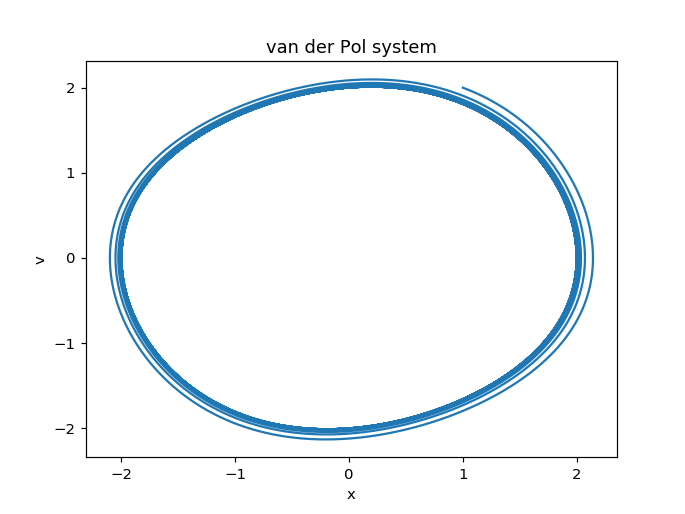

In [22]:
%matplotlib notebook
# plot the solutions curves (x,v)
plt.title('van der Pol system')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(x,v)
plt.savefig('VdPorig.png')
#plt.plot(v)

# Now we check how good is the reprodction by solving the 

# Tadaaah, wen wundert's, dass rauskommt, was man reinsteckt, hehehehe

In [23]:
def DVecCMat(ydot,XV,n):
    x,v=XV
    laver=len(x)
    l=(n+1)*(n+2)//2
    cijn=np.append(np.array(np.where(np.less_equal(*np.mgrid[-n-1:0,-1:-n-2:-1]))),np.arange(l)).reshape(3,l).T
    dim=len(cijn)
    c=np.zeros((dim,dim),dtype=float)
    d=np.zeros(dim,dtype=float)
    for i,j,r in cijn:
        d[r]=np.sum(ydot*x**i*v**j)
        for k,l,s in cijn:
            c[r,s]=np.sum(x**i*v**j*x**k*v**l)
    return d,c

In [24]:
norder=4
# Calculate the coefficients for the r.h.s. of vdot
d,c=DVecCMat(xdot,XV,norder)
#print(np.einsum('ij,j->i',np.linalg.inv(c),d)[[1,4,7]],'\n',axdot[[1,4,7]])
axdot=np.einsum('ij,j->i',np.linalg.inv(c),d)
# Calculate the coefficients for the r.h.s. of vdot
d,c=DVecCMat(vdot,XV,norder)
#print(np.einsum('ij,j->i',np.linalg.inv(c),d)[[1,4,7]],'\n',avdot[[1,4,7]])
avdot=np.einsum('ij,j->i',np.linalg.inv(c),d)

In [25]:
def ffit(t,r,*argv):
    x,v=r
    #return np.asarray(argv[0])
    #axdot,avdot=np.asarray(argv[0])
    axdot,avdot=argv
    l=len(axdot)
    n=int((-3+np.sqrt(1+8*l))//2)
    c=np.zeros((n+1,n+1),dtype=float)
    cbool=np.less_equal(*np.mgrid[-n-1:0,-1:-n-2:-1])
    c[cbool]=axdot
    dxdt=poly.polyval2d(x,v,c)
    l=len(avdot)
    n=int((-3+np.sqrt(1+8*l))//2)
    c=np.zeros((n+1,n+1),dtype=float)
    cbool=np.less_equal(*np.mgrid[-n-1:0,-1:-n-2:-1])
    c[cbool]=avdot
    dvdt=poly.polyval2d(x,v,c)
    return dxdt,dvdt

In [26]:
solfit=solve_ivp(ffit, [t0, t1], r0,method='DOP853',t_eval=teval,rtol=rtol,atol=atol,args=(axdot,avdot))

<IPython.core.display.Javascript object>


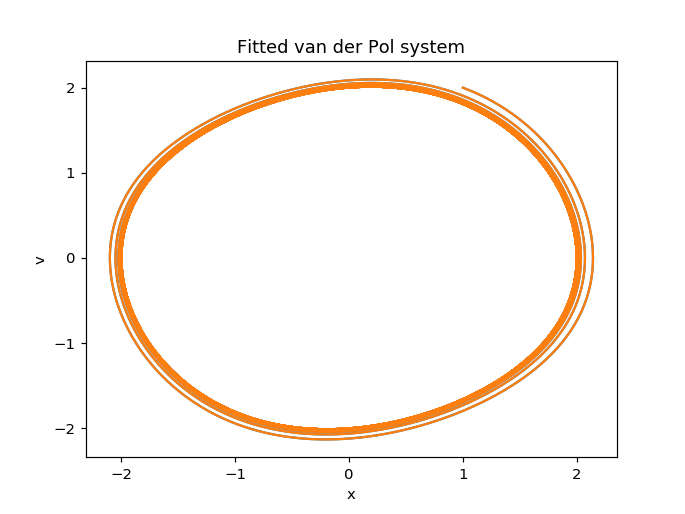

In [27]:
%matplotlib notebook
# plot the solutions curves (x,v)
xfit=solfit.y[0]
vfit=solfit.y[1]
plt.title('Fitted van der Pol system')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(xfit,vfit)
plt.plot(x,v)
plt.savefig('VdPFitted.png')
#plt.plot(v)

In [4]:
%matplotlib notebook
# plot the solutions curves (x,v)
xfit=solfit.y[0]
vfit=solfit.y[1]
plt.title('Difference between fitted and original van der Pol system')
plt.xlabel('Timestep')
plt.ylabel('$\Delta$')
plt.plot(xfit-x)
#plt.plot(vfit-v)
plt.savefig('VdPDiff.png')
#plt.plot(v)

NameError: name 'solfit' is not defined

In [40]:
np.max(v-vfit)

0.0

In [20]:
avdot

array([ 3.66852646e-07,  1.00001153e-01, -1.91838467e-07, -3.29152984e-07,
        2.50039278e-08, -9.99999819e-01,  1.17691741e-08,  4.22097794e-08,
       -3.32699202e-09, -1.91833351e-07, -1.00000164e-01,  5.01501916e-08,
       -7.23924404e-09, -2.92501312e-09,  2.50287542e-08])